In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = os.path.join(os.getcwd(), '100knock-data_analytics', '6章')

In [3]:
factories_path = os.path.join(path, 'tbl_factory.csv')
factories = pd.read_csv(factories_path, index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北
FC00006,山形工場,30,東北
FC00007,那須工場,25,東北
FC00008,青森工場,16,東北


In [4]:
warehouses_path = os.path.join(path, 'tbl_warehouse.csv')
warehouses = pd.read_csv(warehouses_path, index_col=0)
warehouses

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北
WH00006,山形倉庫,65,東北


In [5]:
cost_path = os.path.join(path, 'rel_cost.csv')
cost = pd.read_csv(cost_path, index_col=0)
cost

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8
6,FC00002,WH00003,1.6
7,FC00003,WH00001,1.2
8,FC00003,WH00002,1.3
9,FC00003,WH00003,1.5


In [6]:
trans_path = os.path.join(path, 'tbl_transaction.csv')
trans = pd.read_csv(trans_path, index_col=0)
trans

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,2019-12-31 19:35:07,FC00003,WH00001,36


In [7]:
join_data = pd.merge(trans, cost, left_on=['ToFC', 'FromWH'], right_on=['FCID', 'WHID'], how='left')
join_data

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8
...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3


In [8]:
join_data = pd.merge(join_data, factories, on='FCID', how='left')
join_data

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東
...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3,那須工場,25,東北
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6,木更津工場,29,関東
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2,多摩工場,31,関東
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3,仙台工場,21,東北


In [9]:
join_data.columns

Index(['TransactionDate', 'ToFC', 'FromWH', 'Quantity', 'FCID', 'WHID', 'Cost',
       'FCName', 'FCDemand', 'FCRegion'],
      dtype='object')

In [10]:
join_data = pd.merge(join_data, warehouses, on='WHID', how='left')
join_data = join_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
join_data

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,29,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
3996,2019-12-31 17:10:21,35,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
3997,2019-12-31 19:35:07,36,1.2,FC00003,多摩工場,31,WH00001,杉並倉庫,35,関東
3998,2019-12-31 21:45:07,34,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北


In [11]:
kanto = join_data.loc[join_data['WHRegion']=='関東']
kanto

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東
...,...,...,...,...,...,...,...,...,...,...
3984,2019-12-30 12:29:42,22,0.9,FC00002,木更津工場,29,WH00001,杉並倉庫,35,関東
3987,2019-12-30 17:51:24,32,1.3,FC00003,多摩工場,31,WH00002,品川倉庫,41,関東
3992,2019-12-31 01:50:16,33,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
3996,2019-12-31 17:10:21,35,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東


In [12]:
tohoku = join_data.loc[join_data['WHRegion']=='東北']
tohoku

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
...,...,...,...,...,...,...,...,...,...,...
3993,2019-12-31 03:35:04,20,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
3994,2019-12-31 07:05:56,11,0.8,FC00005,仙台工場,21,WH00004,郡山倉庫,60,東北
3995,2019-12-31 11:27:51,29,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
3998,2019-12-31 21:45:07,34,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北


In [13]:
print("関東支社の総コスト: " + str(kanto['Cost'].sum()) + "万円")
print("東北支社の総コスト: " + str(tohoku['Cost'].sum()) + "万円")

関東支社の総コスト: 2189.3万円
東北支社の総コスト: 2062.0万円


In [14]:
print("関東支社の総部品輸送個数: " + str(kanto['Quantity'].sum()) + "個")
print("東北支社の総部品輸送個数: " + str(tohoku['Quantity'].sum()) + "個")

関東支社の総部品輸送個数: 49146個
東北支社の総部品輸送個数: 50214個


In [15]:
tmp = (kanto['Cost'].sum()/kanto['Quantity'].sum()) * 10000
print('関東支社の部品1つあたりの輸送コスト: ' + str(int(tmp)) + '円')
tmp = (tohoku['Cost'].sum()/kanto['Quantity'].sum()) * 10000
print('東北支社の部品1つあたりの輸送コスト: ' + str(int(tmp))+ '円')

関東支社の部品1つあたりの輸送コスト: 445円
東北支社の部品1つあたりの輸送コスト: 419円


In [16]:
cost_chk = pd.merge(cost, factories, on='FCID', how='left')
print('関東支社の平均輸送コスト: ' + str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='関東'].mean()) + '万円')
print('東北支社の平均輸送コスト: ' + str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='東北'].mean()) + '万円')

関東支社の平均輸送コスト: 1.075万円
東北支社の平均輸送コスト: 1.05万円


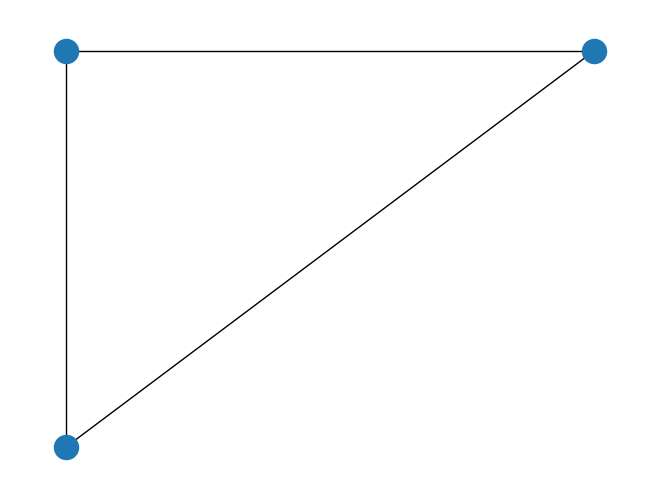

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G=nx.Graph()

# 頂点の設定
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

# 辺の設定
G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')

# 座標の設定
pos={}
pos['nodeA']=(0,0)
pos['nodeB']=(1,1)
pos['nodeC']=(0,1)

# 描画
nx.draw(G, pos)

# 表示
plt.show()

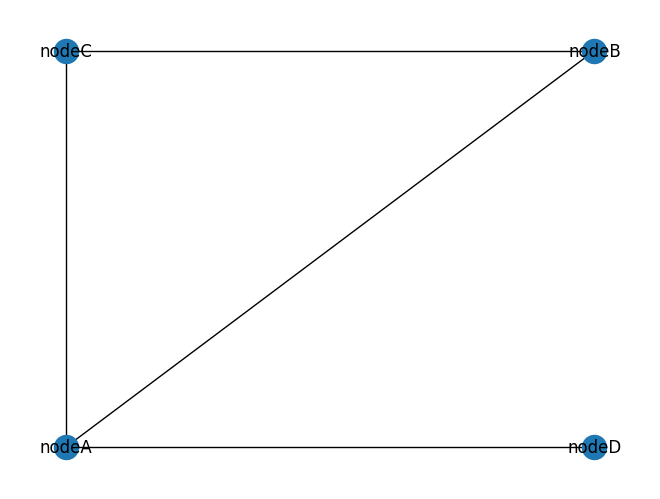

In [18]:
G.add_node('nodeD')
G.add_edge('nodeA', 'nodeD')
pos['nodeD']=(1,0)
nx.draw(G, pos, with_labels=True)
plt.show()

In [19]:
# データ読み込み
w_path = os.path.join(path, 'network_weight.csv')
df_w = pd.read_csv(w_path)
p_path = os.path.join(path, 'network_pos.csv')
df_p = pd.read_csv(p_path)

In [20]:
df_w

,A,B,C,D,E
0,0.000000,0.143353,0.944669,0.521848,0.000000
1,0.143353,0.000000,0.264556,0.456150,0.568434
2,0.944669,0.264556,0.000000,0.000000,0.617635
3,0.521848,0.456150,0.000000,0.000000,0.612096
4,0.000000,0.568434,0.617635,0.612096,0.000000


In [21]:
df_p

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


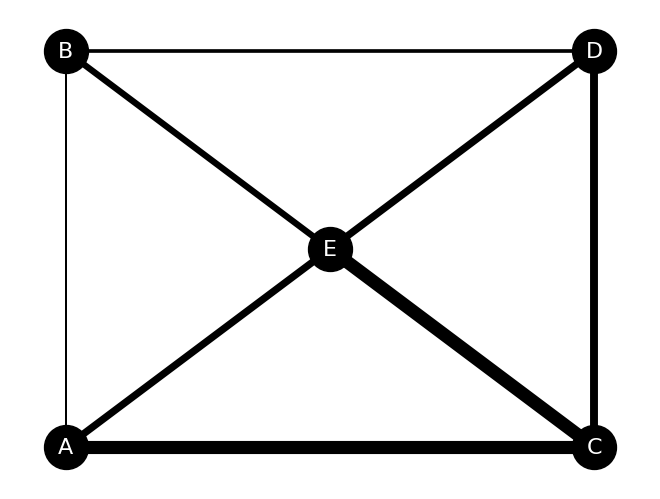

In [22]:
# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
# 辺の設定&エッジの重みのリスト化
size = 10
edge_weights = []
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        if not (i==j):
            #　辺の追加
            G.add_edge(df_w.columns[i], df_w.columns[j])
            # エッジの重みの追加
            edge_weights.append(df_w.iloc[i][j]*size)
            
# 座標の設定
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])

# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

# 表示
plt.show()

In [23]:
tr_path = os.path.join(path, 'trans_route.csv')
df_tr = pd.read_csv(tr_path, index_col='工場')
df_tr

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [24]:
pos_path = os.path.join(path, 'trans_route_pos.csv')
df_pos = pd.read_csv(pos_path)
df_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


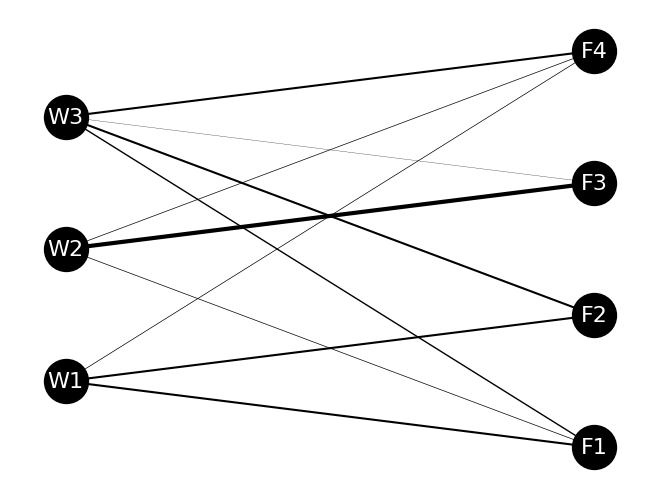

In [25]:
# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

# 辺の設定&エッジの重みのリスト化
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # 辺の追加
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            # エッジの重みの追加
            if num_pre<len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                edge_weights.append(weight)

# 座標の設定
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])

# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

# 表示
plt.show()

In [26]:
# 倉庫と工場間の輸送コスト
tc_path = os.path.join(path, 'trans_cost.csv')
df_tc = pd.read_csv(tc_path, index_col='工場')
df_tc

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [27]:
# 輸送ルート
df_tr

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [28]:
# 輸送コスト関数
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print("総輸送コスト:"+str(trans_cost(df_tr, df_tc)))

総輸送コスト:1493


In [29]:
demand_path = os.path.join(path, 'demand.csv')
df_demand = pd.read_csv(demand_path)
df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [30]:
supply_path = os.path.join(path, 'supply.csv')
df_supply = pd.read_csv(supply_path)
df_supply

,W1,W2,W3
0,35,41,42


In [31]:
# 需要側の制約条件
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i]) + 'への輸送量:' + str(temp_sum) + ' (需要量:' + str(df_demand.iloc[0][i]) + ')')
    if temp_sum>=df_demand.iloc[0][i]:
        print("需要量を満たしています。")
    else:
        print("需要量を満たしていません。輸送ルートを再計算して下さい。")

# 供給側の制約条件
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i]) + 'からの輸送量:' + str(temp_sum) + ' (供給限界:' + str(df_supply.iloc[0][i]) + ')')
    if temp_sum<=df_supply.iloc[0][i]:
        print("供給限界の範囲内です。")
    else:
        print("供給限界を超過しています。輸送ルートを再計算して下さい。")

F1への輸送量:30 (需要量:28)
需要量を満たしています。
F2への輸送量:30 (需要量:29)
需要量を満たしています。
F3への輸送量:32 (需要量:31)
需要量を満たしています。
F4への輸送量:25 (需要量:25)
需要量を満たしています。
W1からの輸送量:35 (供給限界:35)
供給限界の範囲内です。
W2からの輸送量:40 (供給限界:41)
供給限界の範囲内です。
W3からの輸送量:42 (供給限界:42)
供給限界の範囲内です。


In [32]:
new_path = os.path.join(path, 'trans_route_new.csv')
df_tr_new = pd.read_csv(new_path, index_col='工場')
df_tr_new

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [33]:
# 総輸送コスト再計算
print('総輸送コスト（変更後）:'+str(trans_cost(df_tr_new, df_tc)))

総輸送コスト（変更後）:1428


In [34]:
# 制約条件計算関数
# 需要側
def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum >= df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

# 供給側
def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i] = 1
    return flag     

print('需要条件計算結果:' + str(condition_demand(df_tr_new, df_demand)))
print('供給条件計算結果:' + str(condition_supply(df_tr_new, df_supply)))

需要条件計算結果:[1. 1. 1. 1.]
供給条件計算結果:[1. 0. 1.]


条件を満たす場合は1, そうでない場合は0を表記